# **Preparation**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
#Input the csv file after imputation.
newpizza = pd.read_csv("/content/pizza&GDP.csv")

In [44]:
newpizza.describe()

,Unnamed: 0,latitude,longitude,menus.amountMax,menus.amountMin,priceRangeMin,priceRangeMax,average_price,GDP
count,3510.00000,3510.000000,3510.000000,3510.000000,3510.000000,1557.000000,1557.000000,3510.000000,3510.000000
mean,1754.50000,38.555114,-87.472055,12.482742,11.431106,15.597945,36.566474,11.956924,96356.955840
std,1013.39405,4.651092,16.430008,12.277341,6.653145,18.495854,21.737839,8.403799,78558.353118
min,0.00000,18.411826,-157.837461,0.250000,0.250000,0.000000,12.000000,0.250000,4090.000000
25%,877.25000,35.769852,-94.202573,8.000000,7.990000,0.000000,30.000000,8.000000,39615.000000
50%,1754.50000,40.020710,-81.675414,12.479186,11.427849,25.000000,40.000000,11.953518,56126.000000
75%,2631.75000,41.455179,-74.743820,14.990000,13.990000,25.000000,40.000000,14.490000,146826.000000
max,3509.00000,64.854370,-66.024871,312.950000,118.990000,347.000000,666.000000,161.950000,278260.000000


In [45]:
newpizza.head()

,Unnamed: 0,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,...,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,average_price,GDP
0,0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,...,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR,19.00,24810
1,1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,...,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR,18.95,24810
2,2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,...,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood,12.00,278260
3,3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,...,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood,13.00,278260
4,4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,...,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood,13.00,278260


In [46]:
#Obtain the interested imformation.
pizza=newpizza[['id', 'city', 'address', 'postalCode', 
                          'menus.name', 'menus.amountMax', 'menus.amountMin',"average_price","GDP"]]
pizza.head()

,id,city,address,postalCode,menus.name,menus.amountMax,menus.amountMin,average_price,GDP
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,22.50,15.50,19.00,24810
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,18.95,18.95,18.95,24810
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",12.00,12.00,12.00,278260
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",13.00,13.00,13.00,278260
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",13.00,13.00,13.00,278260


In [47]:
pizza.info()##View the variables namesinformation.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3510 non-null   object 
 1   city             3510 non-null   object 
 2   address          3510 non-null   object 
 3   postalCode       3484 non-null   object 
 4   menus.name       3510 non-null   object 
 5   menus.amountMax  3510 non-null   float64
 6   menus.amountMin  3510 non-null   float64
 7   average_price    3510 non-null   float64
 8   GDP              3510 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 246.9+ KB


# **Confidence Interval for average price**

In [42]:
#Dropping the outliers. (Like what we have done in "Data Processing/0_2 Detect Outlier .ipynb")
Q1=np.quantile(newpizza['average_price'],0.25)
Q3=np.quantile(newpizza['average_price'],0.75)
lowerlimit=Q1-1.5*(Q3-Q1)
upperlimit=Q3+1.5*(Q3-Q1)
non_outlier_pizza=newpizza[newpizza['average_price']<upperlimit]

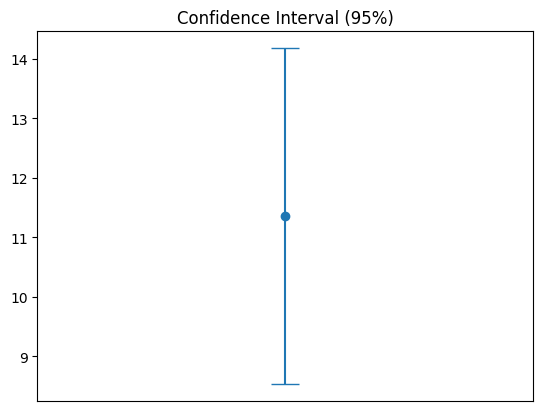

Confidence Interval of pizza average price: [8.53, 14.18]


11.352840868690233

In [48]:
# Calculate the sample mean and standard deviation
non_outlier_pizza_mean=non_outlier_pizza["average_price"].mean()
non_outlier_pizza_std=non_outlier_pizza["average_price"].std(ddof=1)

# Set the confidence level and degrees of freedom
confidence_level = 0.95
n = len("average_price")
df = n - 1

# Calculate the t-value
t_value = stats.t.ppf((1 + confidence_level) /2, df)

# Calculate the standard error of the mean
sem = non_outlier_pizza_std / np.sqrt(n)

# Calculate the margin of error and confidence interval
margin_of_error = t_value * sem
ci_lower = non_outlier_pizza_mean - margin_of_error
ci_upper = non_outlier_pizza_mean + margin_of_error

# Create the graph
plt.errorbar(0, non_outlier_pizza_mean, yerr=margin_of_error, fmt='o', capsize=10)
plt.xlim(-1, 1)
plt.xticks([])
plt.title("Confidence Interval ({}%)".format(int(confidence_level * 100)))
plt.show()

# Print the results
print("Confidence Interval of pizza average price: [{:.2f}, {:.2f}]".format(ci_lower, ci_upper))
non_outlier_pizza_mean

In [34]:
#Drop the duplicates data when the id & pizza names are same at the time.
pizza_sub = non_outlier_pizza.drop_duplicates(subset=['id', 'menus.name'])
#Count the type of pizza
names_of_pizza = pizza_sub['menus.name'].value_counts()
names_of_pizza

Cheese Pizza                            130
White Pizza                              74
Margherita Pizza                         60
Pizza                                    57
Hawaiian Pizza                           52
                                       ... 
Naan Pizza 1                              1
White Pizza With Broccoli Rabe            1
White Pizza With Broccoli or Spinach      1
Wood Oven Pizza                           1
Steak Pizzaiola                           1
Name: menus.name, Length: 1572, dtype: int64

In [35]:
# Drop duplicates
pizza_sub = non_outlier_pizza.drop_duplicates(subset=['id', 'menus.name'])

# Count the pizza names
names_of_pizza = pizza_sub['menus.name'].value_counts()

# Merge `names_of_pizza` to `pizza_sub`
pizza_sub = pd.merge(pizza_sub, names_of_pizza.to_frame(),
                     left_on='menus.name', right_index=True, how='left')
names_of_pizza.head(5)

Cheese Pizza        130
White Pizza          74
Margherita Pizza     60
Pizza                57
Hawaiian Pizza       52
Name: menus.name, dtype: int64

In [36]:
# Get the 5 most common types of pizza
top_pizzas = names_of_pizza.head(5).index

# Set the confidence level and degrees of freedom
confidence_level = 0.95
n = len(non_outlier_pizza)

# Loop through each of the top pizzas and calculate the confidence interval
for pizza_type in top_pizzas:
    # Get the sample data for the current pizza type
    sample = non_outlier_pizza[non_outlier_pizza["menus.name"] == pizza_type]["average_price"]
    
    # Calculate the sample mean and standard deviation
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    
    # Calculate the t-value
    df = len(sample) - 1
    t_value = stats.t.ppf((1 + confidence_level) / 2, df)
    
    # Calculate the standard error of the mean
    sem = sample_std / np.sqrt(n)
    
    # Calculate the margin of error and confidence interval
    margin_of_error = t_value * sem
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error

    # Print the results for the current pizza type
    print("{}: {:.2f} +/- {:.2f} ({}% CI: [{:.2f}, {:.2f}])".format(pizza_type, sample_mean, margin_of_error, int(confidence_level * 100), ci_lower, ci_upper))


Cheese Pizza: 9.75 +/- 0.12 (95% CI: [9.62, 9.87])
White Pizza: 12.69 +/- 0.11 (95% CI: [12.58, 12.81])
Margherita Pizza: 12.37 +/- 0.11 (95% CI: [12.27, 12.48])
Pizza: 8.78 +/- 0.12 (95% CI: [8.66, 8.90])
Hawaiian Pizza: 13.36 +/- 0.14 (95% CI: [13.22, 13.51])
